In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [6]:
# calculate the median for NA values
import  math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [10]:
# fill NA values with median number
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [12]:
# create Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(df[["area", "bedrooms", "age"]], df.price)

LinearRegression()

In [14]:
# check our coefficients or slope values
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [15]:
# check intercept
reg.intercept_

383725.0

In [19]:
# do prediction
reg.predict([[3000, 3, 40]])

/Users/parisakhaleghi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [21]:
# do calculation for prediction handy
price = 137.25*3000 + -26025*3 + -6825*40 + 383725.0
price

444400.0

In [22]:
# do another prediction
reg.predict([[2500, 4, 5]])

/Users/parisakhaleghi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

/Users/parisakhaleghi/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/Users/parisakhaleghi/anaconda3/lib/python3.11/site-packages/mpl_toolkits/mplot3d/art3d.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


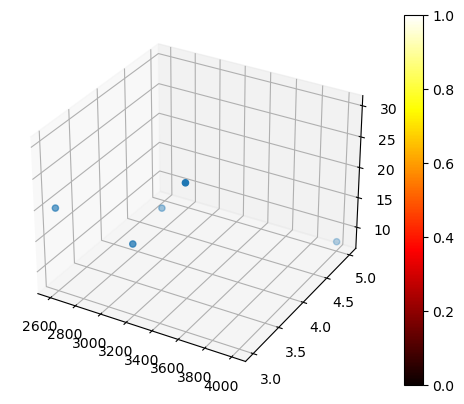

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

# create the plot
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

# define the independent variables
x = df['area']
y = df['bedrooms']
z = df['age']

# add the data points
img = ax.scatter(df.area, df.bedrooms, df.age, reg.predict(df[['area', 'bedrooms', 'age']]))
figure.colorbar(img)
plt.show()
